<span style="font-size:30px;">Importing Libraries</span>

In [1]:
#%pip install seaborn
#%pip install hyperopt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, learning_curve
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_regression, f_classif
#from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from hyperopt import fmin, tpe, hp                 


<span style="font-size:30px;">Loading datasets</span>

In [2]:
import os
for dirname, _, filenames in os.walk(r'Diabetes_training set.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv(r'Diabetes_training set.csv')
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


<span style="font-size:30px;">Preprocessing</span>

In [3]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       1000 non-null   int64
 1   HighBP                1000 non-null   int64
 2   HighChol              1000 non-null   int64
 3   CholCheck             1000 non-null   int64
 4   BMI                   1000 non-null   int64
 5   Smoker                1000 non-null   int64
 6   Stroke                1000 non-null   int64
 7   HeartDiseaseorAttack  1000 non-null   int64
 8   PhysActivity          1000 non-null   int64
 9   Fruits                1000 non-null   int64
 10  Veggies               1000 non-null   int64
 11  HvyAlcoholConsump     1000 non-null   int64
 12  AnyHealthcare         1000 non-null   int64
 13  NoDocbcCost           1000 non-null   int64
 14  GenHlth               1000 non-null   int64
 15  MentHlth              1000 non-null   int64
 16  PhysHlt

<span style="font-size:20px;">Cleaning the dataset</span>

In [4]:
#checking if there missing values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
#A DataFrame containing descriptive statistics for all columns of the df DataFrame, including count (count), mean (mean), standard deviation (std), minimum (min), quartiles (25th, 50th, 75th percentiles), and maximum (max).
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,1000.0,0.500,0.500250,0.0,0.0,0.5,1.0,1.0
HighBP,1000.0,0.568,0.495602,0.0,0.0,1.0,1.0,1.0
HighChol,1000.0,0.490,0.500150,0.0,0.0,0.0,1.0,1.0
CholCheck,1000.0,0.981,0.136593,0.0,1.0,1.0,1.0,1.0
BMI,1000.0,28.953,6.365635,15.0,25.0,28.0,32.0,69.0
Smoker,1000.0,0.396,0.489309,0.0,0.0,0.0,1.0,1.0
Stroke,1000.0,0.038,0.191292,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,1000.0,0.150,0.357250,0.0,0.0,0.0,0.0,1.0
PhysActivity,1000.0,0.623,0.484877,0.0,0.0,1.0,1.0,1.0
Fruits,1000.0,0.564,0.496135,0.0,0.0,1.0,1.0,1.0


<span style="font-size:20px;">Cleaning the dataset</span>

In [6]:
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


<span style="font-size:30px;">Exploratory Data Analysis</span>

In [7]:
# divide dataset into two - diabetes and no_diabetes
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]

<span style="font-size:20px;">discover gender distribution</span>

C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\1862118065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\1862118065.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Female', 'Male'])
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\1862118065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\1862118065.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Female', 'Male'])


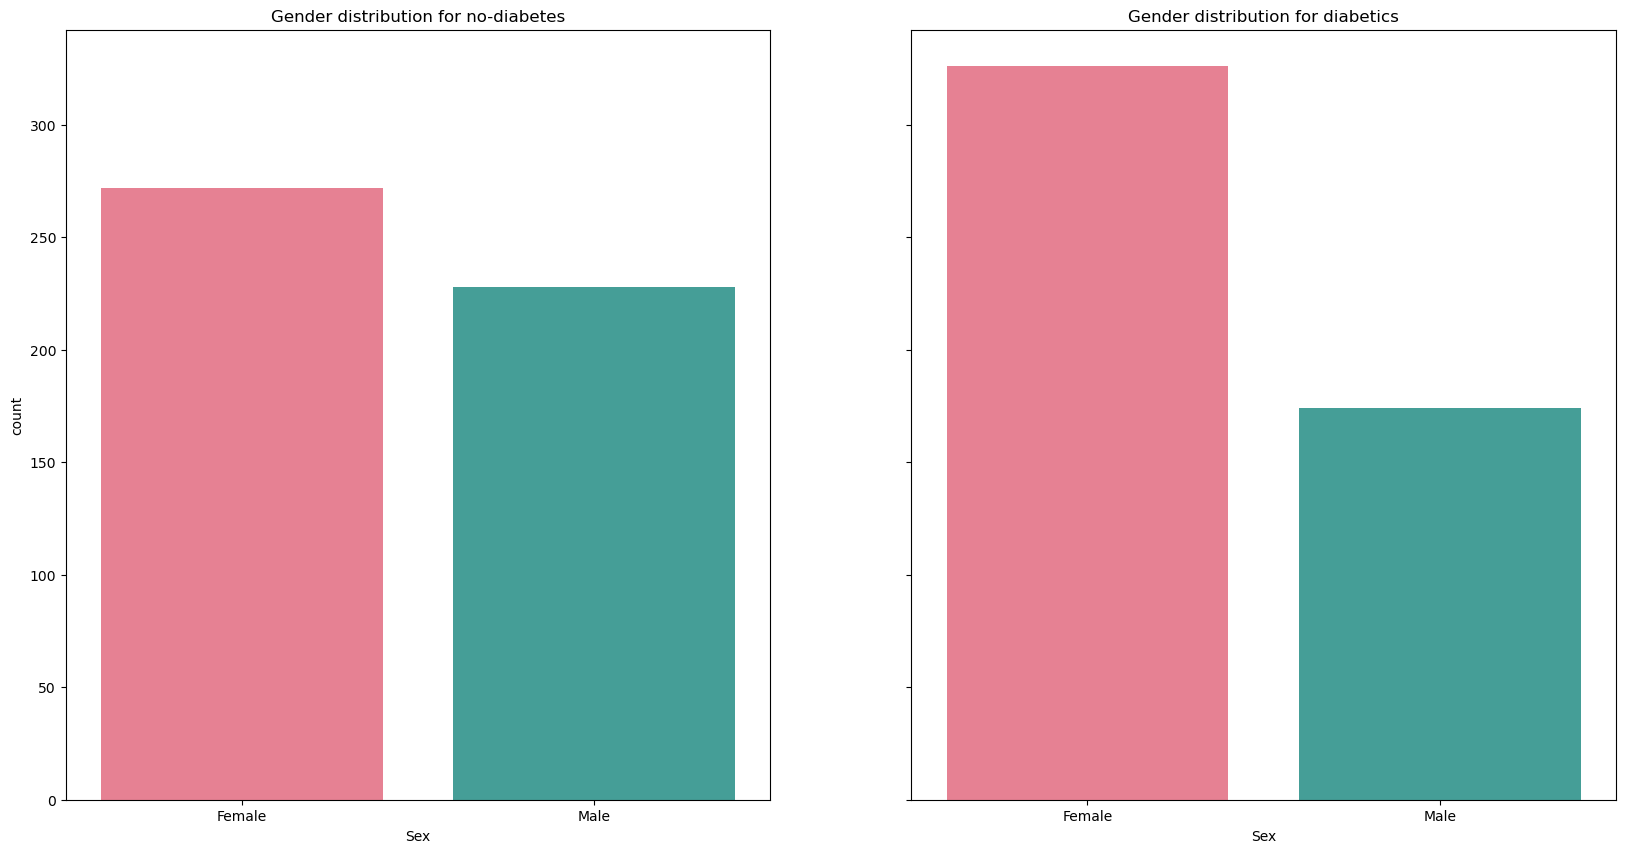

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

<span style="font-size:20px;">age distribution for people with diabetes</span>

C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\78072496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_yes, x='Age',palette='coolwarm')
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\78072496.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)


[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

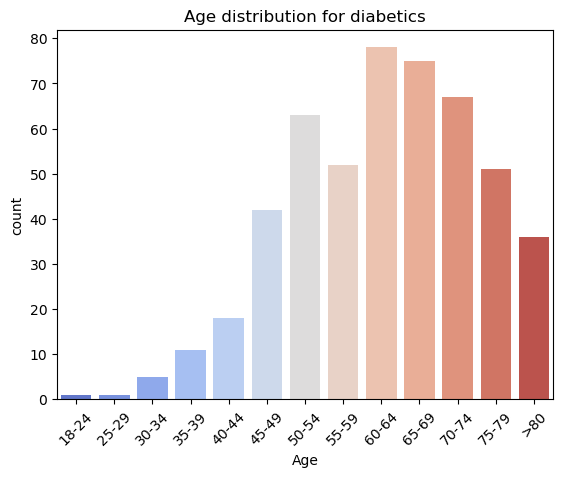

In [9]:
ax = sns.countplot(data=df_yes, x='Age',palette='coolwarm')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

<span style="font-size:20px;">BMI for people with diabetes</span>

(15.0, 60.0)

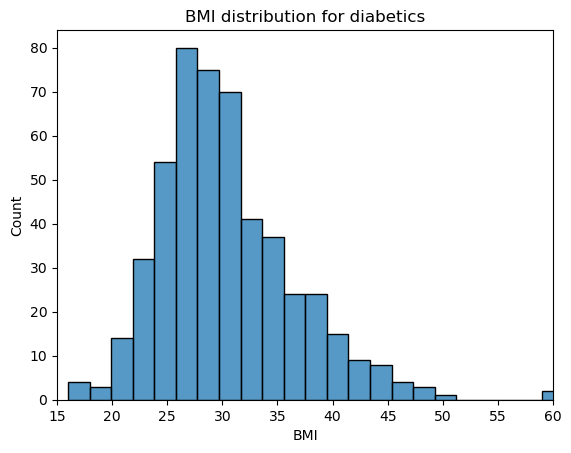

In [10]:
sns.histplot(data=df_yes, x='BMI').set(title='BMI distribution for diabetics')
#remove outliers for better visualization, less than 15 and greater than 60.
plt.xlim(15, 60)

C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\2495720004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\2495720004.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No diabetes', 'Diabetic'])


(15.0, 60.0)

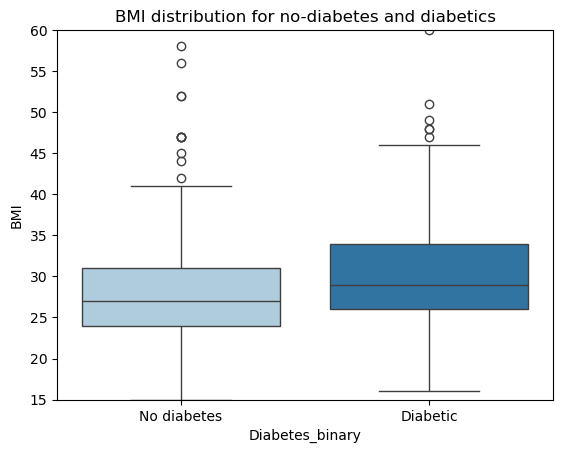

In [11]:
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticklabels(['No diabetes', 'Diabetic'])
plt.ylim(15, 60)

<span style="font-size:20px;">High Cholesterol, High Blood Pressure, Smoking, Alcohol Consumption, Physical Activity</span>

C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\3160687086.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\3160687086.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\3160687086.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\3160687086.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\Jake\AppData\Local\Temp\ipykernel_28228\3160687086.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\Jake\AppData\Local\Temp\ipykern

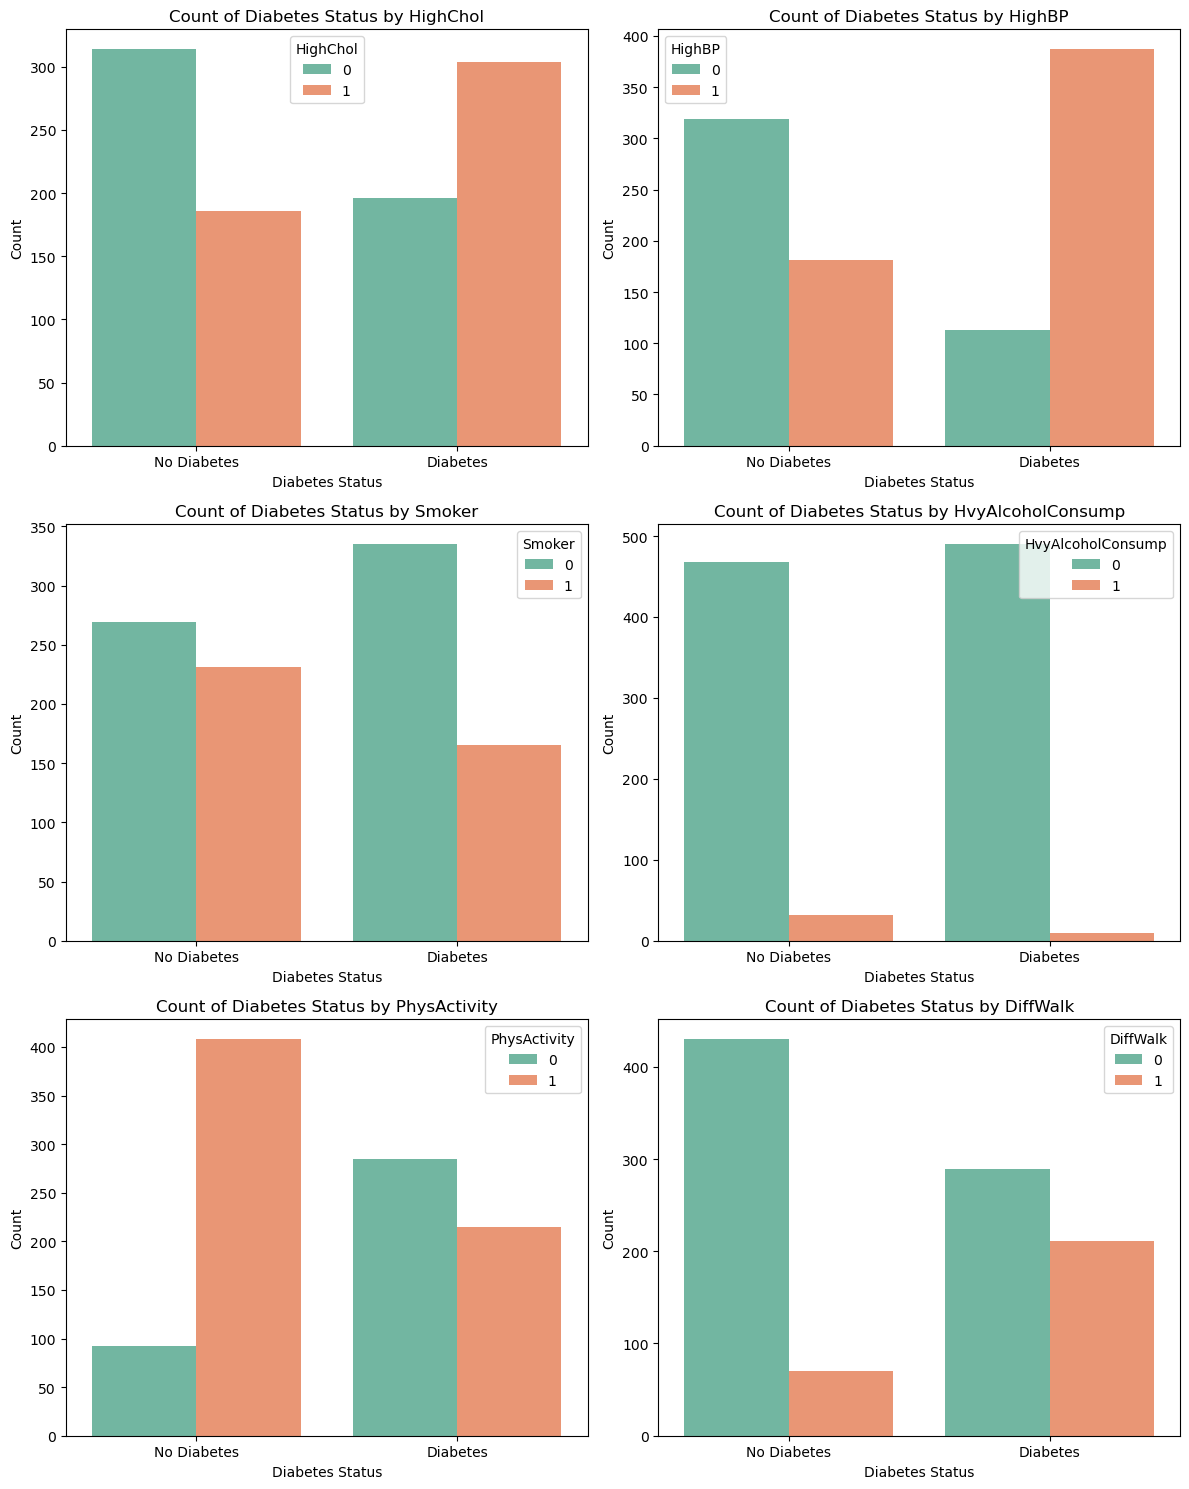

In [12]:
# There are some binary columns that we can visualy compare data between no-diabetes and diabetics.
# Lets iterate from those columns and build plots in one go.
col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3  # number of rows
b = 2  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(12, 15))
for col in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df, x='Diabetes_binary', hue=col, palette='Set2')
    ax.set(title=f'Count of Diabetes Status by {col}', xlabel='Diabetes Status', ylabel='Count')
    ax.set_xticklabels(['No Diabetes', 'Diabetes'])
    ax.legend(title=col)
    c += 1  
plt.tight_layout()
plt.show()

<span style="font-size:20px;">Correlation matrix</span>

In [13]:
# Create a correlation matrix
corr_matrix = df.corr()
# Do some conditional formatting for better readability
cm = sns.light_palette("seagreen", as_cmap=True)
corr_matrix_style = corr_matrix.style.background_gradient(cmap = cm)
corr_matrix_style

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.415864,0.236047,0.139169,0.201023,-0.134952,0.052302,0.173635,-0.398238,-0.185526,-0.129113,-0.109677,0.115065,0.078966,0.567973,0.055071,0.212160,0.313691,-0.110136,0.232437,-0.329215,-0.641069
HighBP,0.415864,1.000000,0.301582,0.115218,0.233748,0.053959,0.088861,0.219362,-0.211875,-0.135776,-0.080279,-0.048871,0.080076,0.049839,0.400225,0.112941,0.199403,0.248779,-0.050792,0.325211,-0.143031,-0.311326
HighChol,0.236047,0.301582,1.000000,0.092456,0.086471,0.024378,0.077214,0.137255,-0.112561,-0.045826,-0.039507,-0.065620,0.069262,0.010299,0.247245,0.095355,0.133065,0.223900,-0.020318,0.206253,-0.131680,-0.228753
CholCheck,0.139169,0.115218,0.092456,1.000000,-0.029809,-0.007129,0.027660,0.058463,-0.078033,-0.048508,-0.075201,-0.043892,0.278818,-0.112279,0.085813,-0.056765,0.041370,0.070707,-0.050225,0.121373,-0.047765,-0.036195
BMI,0.201023,0.233748,0.086471,-0.029809,1.000000,-0.018122,-0.045388,0.012347,-0.195792,-0.065131,-0.009629,-0.045466,0.022371,0.035899,0.179149,0.024255,0.115150,0.220714,0.000607,-0.119412,-0.010316,-0.115173
Smoker,-0.134952,0.053959,0.024378,-0.007129,-0.018122,1.000000,0.063653,0.003436,0.051861,0.002705,-0.007353,0.064913,-0.010181,0.008086,-0.001625,0.058347,0.045117,0.026038,0.178523,0.050516,0.013145,0.048882
Stroke,0.052302,0.088861,0.077214,0.027660,-0.045388,0.063653,1.000000,0.180165,-0.104403,0.027085,-0.055174,-0.015540,0.012146,-0.004857,0.152083,0.108228,0.093853,0.096835,-0.013612,0.119918,-0.025090,-0.067051
HeartDiseaseorAttack,0.173635,0.219362,0.137255,0.058463,0.012347,0.003436,0.180165,1.000000,-0.135511,-0.042922,-0.054238,-0.032112,0.039548,0.071210,0.247665,0.128018,0.182570,0.198443,0.049694,0.213920,-0.139206,-0.186755
PhysActivity,-0.398238,-0.211875,-0.112561,-0.078033,-0.195792,0.051861,-0.104403,-0.135511,1.000000,0.123283,0.176612,0.070300,-0.025102,-0.100364,-0.392722,-0.087745,-0.230965,-0.349173,0.057041,-0.151803,0.232760,0.369772
Fruits,-0.185526,-0.135776,-0.045826,-0.048508,-0.065131,0.002705,0.027085,-0.042922,0.123283,1.000000,0.228853,-0.027023,0.015104,-0.011032,-0.148548,-0.020575,-0.058664,-0.047036,-0.023559,0.023315,0.149379,0.195663


<Axes: >

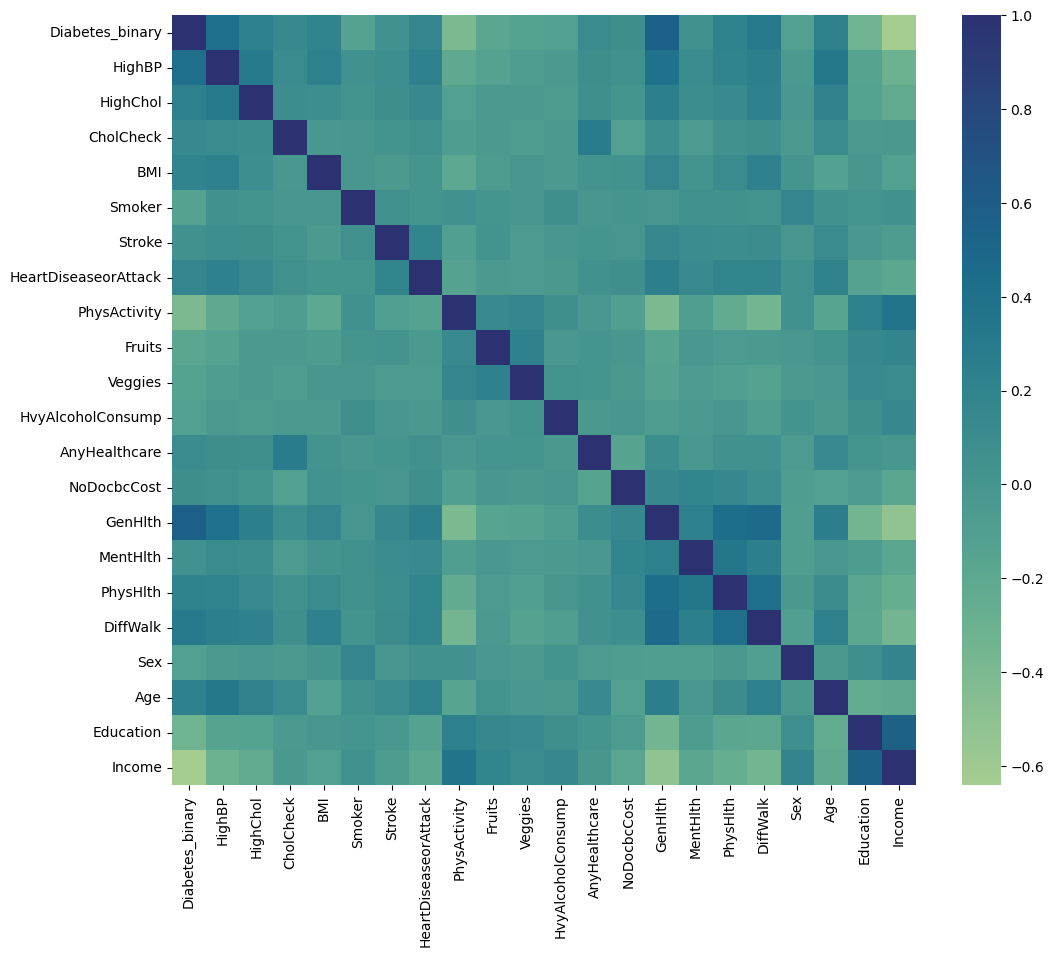

In [14]:
# Visualize relationship between all variables
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, cmap='crest')

<span style="font-size:30px;">Observation data</span>

<span style="font-size:20px;">Feature Selection</span>

In [15]:
# Define features and target
df_train = pd.read_csv('Diabetes_training set.csv')
df_test = pd.read_csv('Diabetes_test set.csv')

X_train = df_train.drop('Diabetes_binary', axis=1)
X_test = df_test.drop('Diabetes_binary', axis=1)
y_train = df_train['Diabetes_binary']
y_test = df_test['Diabetes_binary']

In [16]:
# Fit the feature selector using the training data
selector = SelectKBest(score_func=chi2, k=12)
X_train_new = selector.fit_transform(X_train, y_train)
 
# Gets the selected feature index
selected_columns = selector.get_support(indices=True)
 

important_features = X_train.columns[selected_columns].tolist()
 
# Displays the selected feature
print("Selected features:", important_features)
 
# Convert test data using the same selector
X_test_new = selector.transform(X_test)

Selected features: ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


In [17]:
# Create a DataFrame for the selected features
X_train_selected = pd.DataFrame(X_train_new, columns=important_features)

In [18]:
# Standardizing the features (important for models sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new )
X_test_scaled = scaler.transform(X_test_new)

<span style="font-size:30px;"> Machine Learning models</span>

<span style="font-size:20px;">1.Logistic Regression</span>

In [19]:
# Creating and training the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=200)

# Train model using scaled data
logistic_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

# Output the evaluation results
print(f"Accuracy of Logistic Regression Model: {accuracy_logistic:.3f}")
print("Classification Report:")
print(class_report_logistic)

Accuracy of Logistic Regression Model: 0.880
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       100
           1       0.84      0.94      0.89       100

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



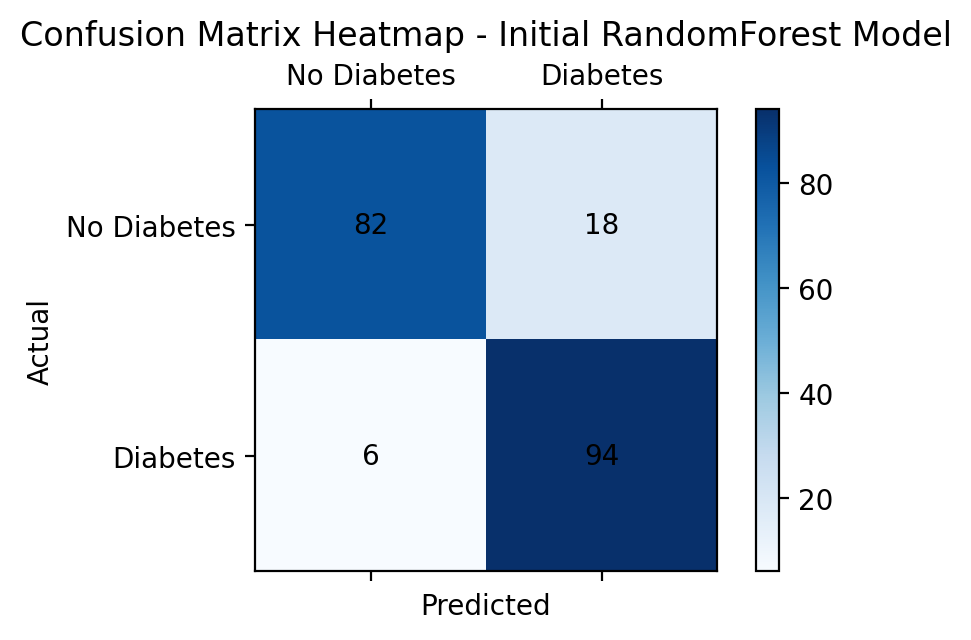

In [20]:
# Plot a confusion matrix for the optimized model
cm_initial = confusion_matrix(y_test, y_pred_logistic)                  
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)        
cax = ax.matshow(cm_initial, cmap='Blues')       
fig.colorbar(cax)
                   
ax.set_xlabel('Predicted')         
ax.set_ylabel('Actual')        
ax.set_xticks(np.arange(2))         
ax.set_yticks(np.arange(2))         
ax.set_xticklabels(['No Diabetes', 'Diabetes'])        
ax.set_yticklabels(['No Diabetes', 'Diabetes'])
          
for (i, j), val in np.ndenumerate(cm_initial):          
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
          
plt.title('Confusion Matrix Heatmap - Initial RandomForest Model')          
plt.savefig('Confusion_Matrix_Heatmap_Initial_Model.pdf', format='pdf', bbox_inches='tight')          
plt.show()

<span style="font-size:20px;">2.Random Forest</span>

In [33]:
rdf_model = RandomForestClassifier()
# Establish a Random Forest that has not been optimized yet  
rdf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [34]:
y_pred = rdf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       100
           1       0.81      0.92      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



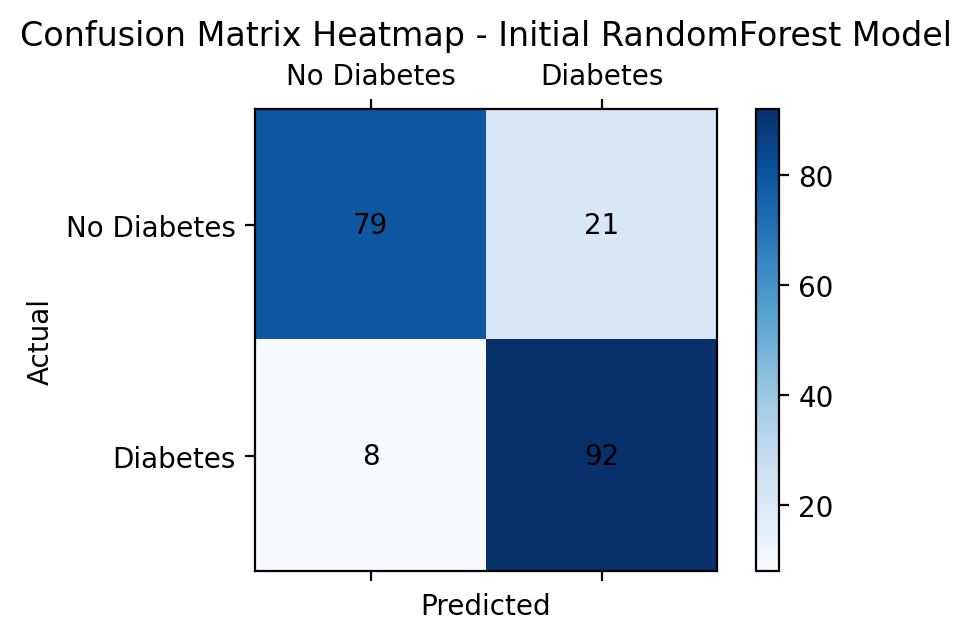

In [35]:
# Plot a confusion matrix for the initial model
cm_initial = confusion_matrix(y_test, y_pred)                  
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)        
cax = ax.matshow(cm_initial, cmap='Blues')       
fig.colorbar(cax)
                   
ax.set_xlabel('Predicted')         
ax.set_ylabel('Actual')        
ax.set_xticks(np.arange(2))         
ax.set_yticks(np.arange(2))         
ax.set_xticklabels(['No Diabetes', 'Diabetes'])        
ax.set_yticklabels(['No Diabetes', 'Diabetes'])
          
for (i, j), val in np.ndenumerate(cm_initial):          
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
          
plt.title('Confusion Matrix Heatmap - Initial RandomForest Model')          
plt.savefig('Confusion_Matrix_Heatmap_Initial_Model.pdf', format='pdf', bbox_inches='tight')          
plt.show()

In [36]:
# Optimize the model
param_grid = {
    # Number of trees
    'n_estimators': [50, 70, 100, 200],
    # Maximum depth of the tree
    'max_depth': [ 20, 30,50],
    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 5, 10],
    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 3, 5],
    # Whether bootstrap samples are used when building trees
    'bootstrap': [True, False]
}
# Create a grid search object and fit the model to find the best parameters
grid_search = GridSearchCV(estimator=rdf_model, param_grid=param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [45]:
rdf_optimized = grid_search.best_estimator_
rdf_optimized.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=3,
                       n_estimators=50)

In [46]:
rdf_optimized = grid_search.best_estimator_
y_pred_optimized = rdf_optimized.predict(X_test_scaled)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       100
           1       0.82      0.93      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



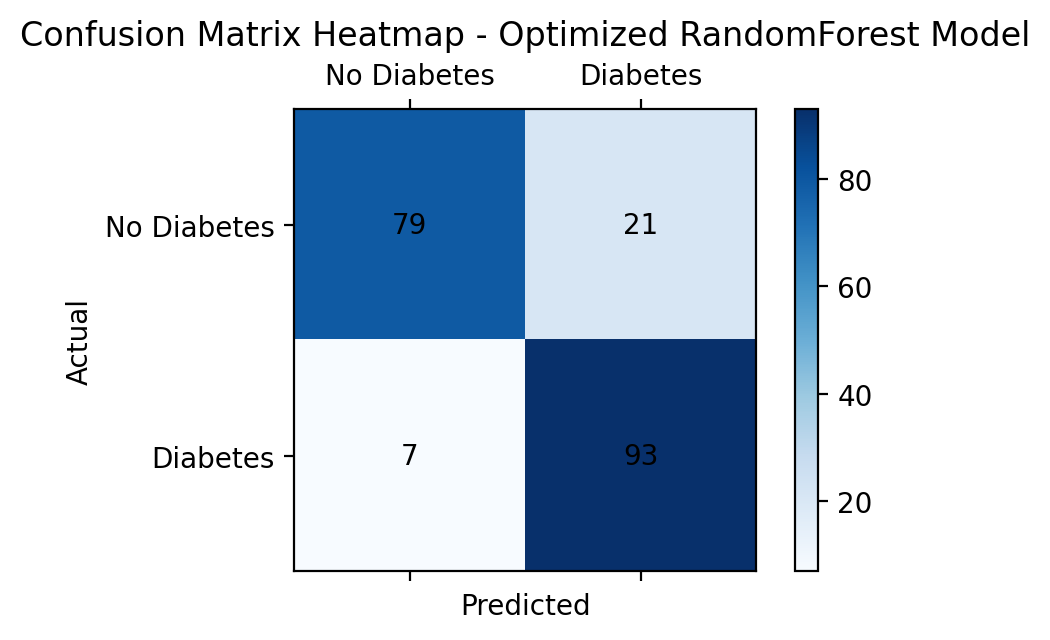

In [47]:
# Plot a confusion matrix for the optimized model
cm_optimized = confusion_matrix(y_test, y_pred_optimized)                  
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)        
cax = ax.matshow(cm_optimized, cmap='Blues')       
fig.colorbar(cax)
                   
ax.set_xlabel('Predicted')         
ax.set_ylabel('Actual')        
ax.set_xticks(np.arange(2))         
ax.set_yticks(np.arange(2))         
ax.set_xticklabels(['No Diabetes', 'Diabetes'])        
ax.set_yticklabels(['No Diabetes', 'Diabetes'])
          
for (i, j), val in np.ndenumerate(cm_optimized):          
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
          
plt.title('Confusion Matrix Heatmap - Optimized RandomForest Model')          
plt.savefig('Confusion_Matrix_Heatmap_Optimized_Model.pdf', format='pdf', bbox_inches='tight')          
plt.show()

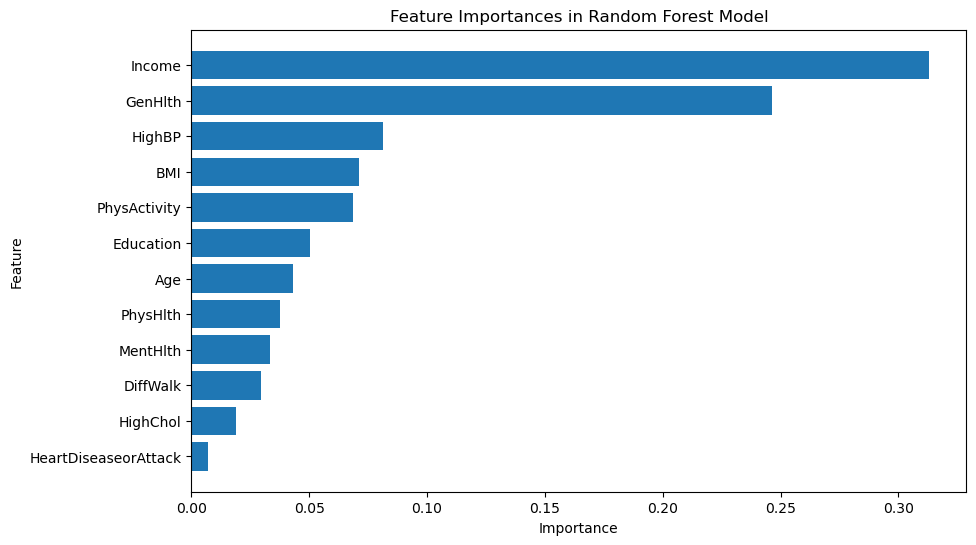

In [48]:

# Acquired feature importance
feature_importances = rdf_optimized.feature_importances_

# Create DataFrame  for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[selected_columns],
    'Importance': feature_importances
})

# In order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Draw a bar chart of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

<span style="font-size:20px;">3.SVM </span>

In [49]:
# Establish a SVM model that has not been optimized yet  
svm_model = SVC(probability = True)#(kernel='rbf', C=100.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       100
           1       0.83      0.92      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



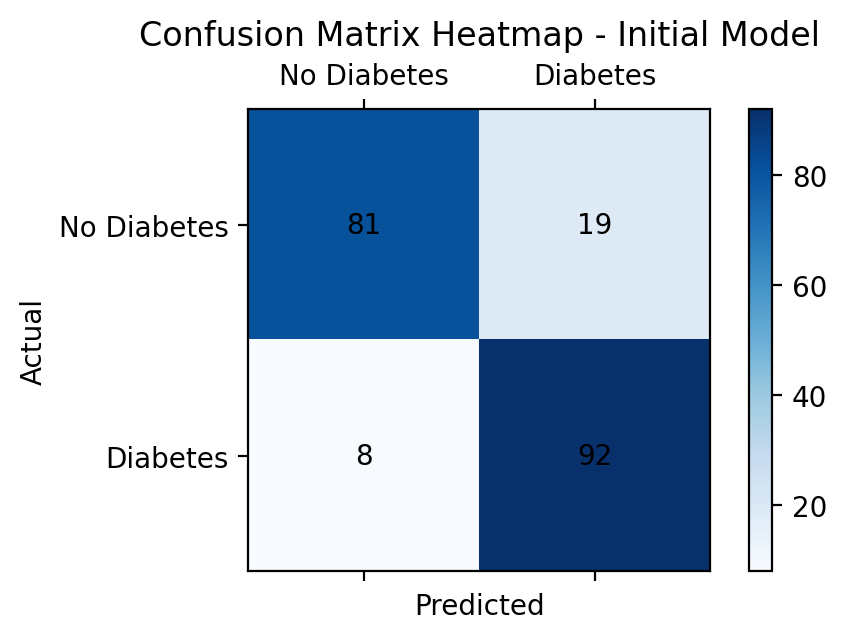

In [50]:
# Plot a confusion matrix for the initial model
cm_initial = confusion_matrix(y_test, y_pred)                  
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)        
cax = ax.matshow(cm_initial, cmap='Blues')       
fig.colorbar(cax)
                   
ax.set_xlabel('Predicted')         
ax.set_ylabel('Actual')        
ax.set_xticks(np.arange(2))         
ax.set_yticks(np.arange(2))         
ax.set_xticklabels(['No Diabetes', 'Diabetes'])        
ax.set_yticklabels(['No Diabetes', 'Diabetes'])
          
for (i, j), val in np.ndenumerate(cm_initial):          
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
          
plt.title('Confusion Matrix Heatmap - Initial Model')          
plt.savefig('Confusion_Matrix_Heatmap_Initial_Model.pdf', format='pdf', bbox_inches='tight')          
plt.show()

In [62]:
# Optimize the model
# Define the hyperparameter space
parameter_space_svc = {
    'C': hp.loguniform('C', np.log(1), np.log(200)),
    'kernel': hp.choice('kernel', ['rbf','linear', 'poly']),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(100))
}

# Initialize the counter
count = 0

# Define the optimization objective function
def func(args):          
    global count          
    count += 1          
#    print(f"\nIteration {count}: Hyperparameters - {args}")    ！！！Due to the setting of 500 iterations, the result output consists of 500 rows. Currently, the specific results have been omitted. But if the detailed process of hyperparameter optimization is required, the "#" symbol can be removed！！！         
    clf = SVC(**args)   # Create an SVM classifier and pass in the hyperparameters               
    clf.fit(X_train, y_train)                   
    prediction = clf.predict(X_test)                   
    score = accuracy_score(y_test, prediction)          
#    print(f'Test accuracy: {score}')    ！！！Due to the setting of 500 iterations, the result output consists of 500 rows. Currently, the specific results have been omitted. But if the detailed process of hyperparameter optimization is required, the "#" symbol can be removed！！！                   
    return -score    # Because the fmin function is by default designed to minimize the objective function, the negative accuracy is returned as the target
                  
# Employ the TPE algorithm for hyperparameter optimization, with the maximum number of evaluations being 100
best = fmin(func, parameter_space_svc, algo=tpe.suggest, max_evals=5)
                  
# Transform the optimal type of kernel function from the index value into the corresponding string
kernel_list = ['rbf','linear','poly']          
best['kernel'] = kernel_list[best['kernel']]
                  
print('\nBest hyperparameters:', best)

100%|██████████| 5/5 [00:00<00:00,  7.14trial/s, best loss: -0.875]

Best hyperparameters: {'C': 3.135728680292501, 'gamma': 0.6103636615835643, 'kernel': 'linear'}


In [63]:
# Establish an SVM classifier and configure it using the optimal hyperparameters
clf_optimized = SVC(          
    C=best['C'],                         
    kernel=best['kernel'],                        
    gamma=best['gamma'],           
#    decision_function_shape='ovr',    # Employ the "ovr" (one-versus-the-rest) strategy in the case of multi-class problems         
    cache_size=5000,    # Cache size, with the unit of MB   
    probability=True
)

# Employ the data of the training set for model training
clf_optimized.fit(X_train_scaled, y_train)

SVC(C=3.135728680292501, cache_size=5000, gamma=0.6103636615835643,
    kernel='linear', probability=True)

In [64]:
# Employ the model to conduct predictions on the test set
y_pred_optimized = clf_optimized.predict(X_test_scaled)
             
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       100
           1       0.85      0.93      0.89       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



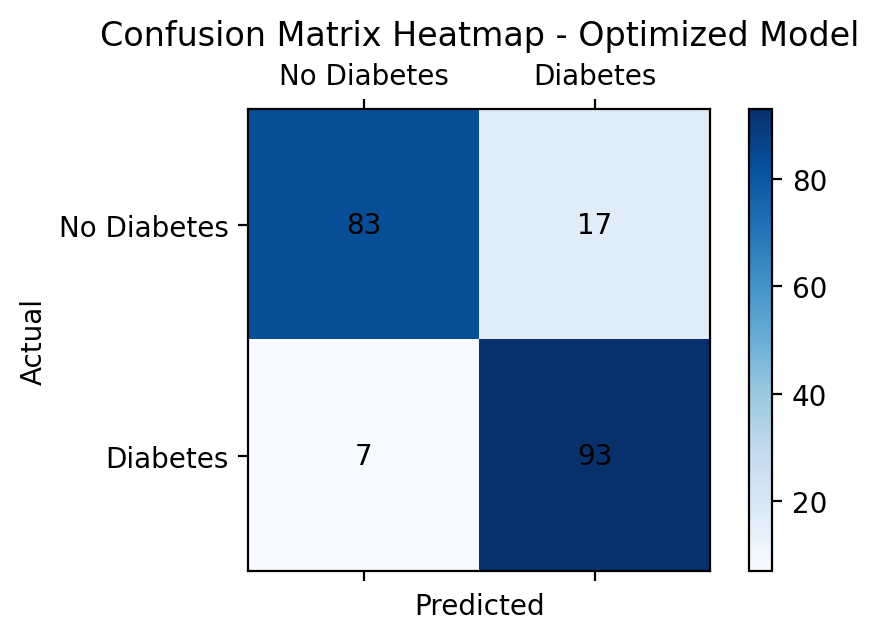

In [65]:
# Plot a confusion matrix for the optimized model
cm_optimized = confusion_matrix(y_test, y_pred_optimized)                  
fig, ax = plt.subplots(figsize=(5, 3), dpi=200)        
cax = ax.matshow(cm_optimized, cmap='Blues')       
fig.colorbar(cax)
                   
ax.set_xlabel('Predicted')         
ax.set_ylabel('Actual')        
ax.set_xticks(np.arange(2))         
ax.set_yticks(np.arange(2))         
ax.set_xticklabels(['No Diabetes', 'Diabetes'])        
ax.set_yticklabels(['No Diabetes', 'Diabetes'])
          
for (i, j), val in np.ndenumerate(cm_optimized):          
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')
          
plt.title('Confusion Matrix Heatmap - Optimized Model')          
plt.savefig('Confusion_Matrix_Heatmap_Optimized_Model.pdf', format='pdf', bbox_inches='tight')          
plt.show()

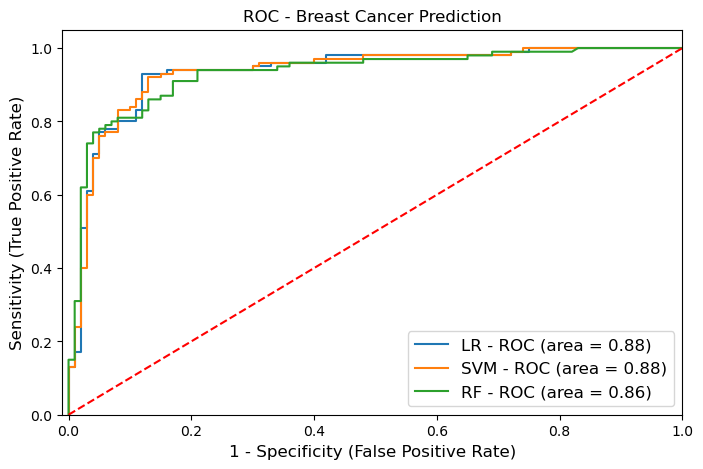

In [68]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': logistic_model,
},
{
    'label': 'SVM',
    'model': clf_optimized,
},
{
    'label': 'RF',
    'model': rdf_optimized,
}
]
for m in models:
    model = m['model'] 
    #model.fit(X_train_scaled, y_train) 
    y_pred=model.predict(X_test_scaled) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[88.0, 88.0, 86.0]
[94.0, 93.0, 93.0]


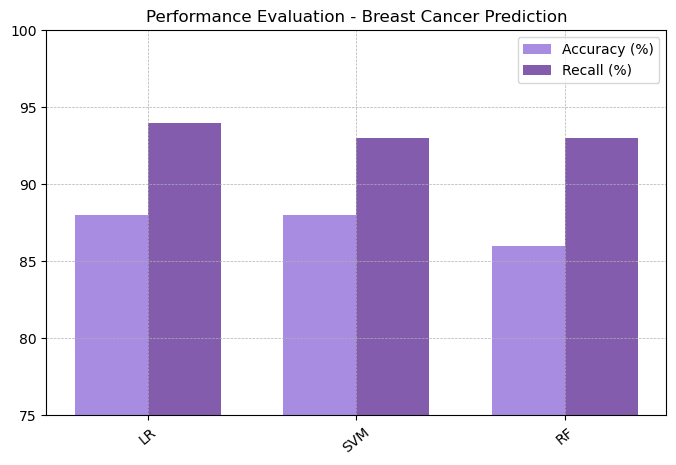

In [71]:
recall = []
accuracy = []

for m in models:
    model = m['model']
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    acc = 100 * round(acc, 4)
    accuracy.append(acc)
    rec = recall_score(y_test, model.predict(X_test_scaled))
    rec = 100 * round(rec, 4)
    recall.append(rec)

print(accuracy)
print(recall)

# data to plot
n_groups = 3
# create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, accuracy, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, recall, bar_width,
                 alpha=opacity,
                 color='rebeccapurple',
                 label='Recall (%)')


plt.ylim([75, 100])
plt.title('Performance Evaluation - Breast Cancer Prediction')
plt.xticks(index + bar_width / 2, ('LR', 'SVM', 'RF'), rotation=40, ha='center')
plt.legend(loc="upper right", fontsize=10)


ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()